<a href="https://colab.research.google.com/github/luishpinto/astrophysics/blob/main/celestial_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from astropy.time import Time

In [24]:
import matplotlib.pyplot as plt

In [17]:
# geografical position of the observer
obs = EarthLocation(lat = 53 * u.deg + 28 * u.arcmin + 49 * u.arcsec,
                    lon = 10 * u.deg + 14 * u.arcmin + 23 * u.arcsec)

phi = obs.lat

In [18]:
utc_shift = 2 * u.hour  # CEST time-zone (+2h)
noon_cest = Time("2020-07-31 12:00:00") - utc_shift

In [19]:
elapsed = np.arange(0, 24 * 60, 5) * u.min
time = noon_cest + elapsed
frame = AltAz(obstime = time,location = obs)

In [23]:
betelgeuse = SkyCoord.from_name('Betelgeuse').transform_to(frame)
sun = get_sun(time).transform_to(frame)

In [38]:
elapsed_night = elapsed[np.where(sun.alt < 0)]
betelgeuse_night = betelgeuse[np.where(sun.alt < 0)]

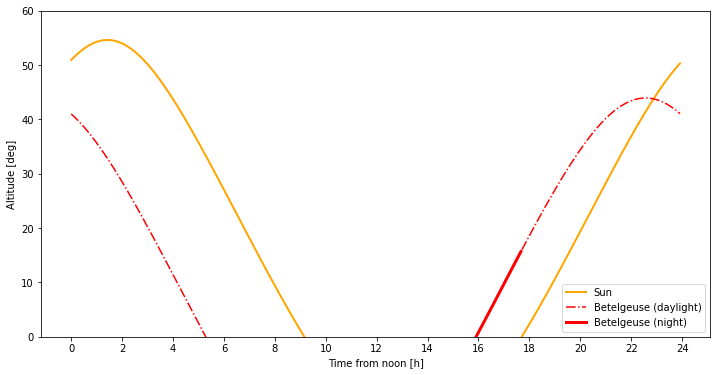

In [49]:
fig = plt.figure(figsize = (12.0, 6.0))
plt.plot(elapsed.to(u.h), sun.alt, color = 'orange', lw = 2.0, label = 'Sun')
plt.plot(elapsed.to(u.h), betelgeuse.alt, color = 'red',linestyle = '-.', label = 'Betelgeuse (daylight)')
plt.plot(elapsed_night.to(u.h), betelgeuse_night.alt, color = 'red', lw = 3.0, label = 'Betelgeuse (night)')
plt.xlabel('Time from noon [h]')
plt.xticks(np.arange(13) * 2)
plt.ylabel('Altitude [deg]')
plt.ylim(0, 60)
plt.legend()
plt.show()